<a href="https://colab.research.google.com/github/pvh95/Dissertation_BME/blob/main/toyBootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import random 
from prettytable import PrettyTable
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")

from collections import defaultdict
np.set_printoptions(precision=6)

In [ ]:
#Parameters
mu = 1.2  # population mean 
sigma = 0.5 # population standard deviation 

In [ ]:
reps = 10000 # number of bootstrap repetitions 
#n = 50 # 'master' sample size 
#b = 50 # size of each bootstrap sample

n = 1000 # 'master' sample size 
b = 1000 # size of each bootstrap sample

In [ ]:
# Generate 'master' sample

np.random.seed(42)
sample = mu + sigma*np.random.randn(n)
xbar   = np.mean(sample)    # sample mean
s2     = np.std(sample)**2  # uncorrected sample variance

# Bootstrapping
allxbar  = np.zeros((reps, 1))       # this is to store the estimated xbar-s
alls2    = np.zeros((reps, 1))       # to store the estimated s2-s
np.random.seed(43)
u = np.random.random((b,reps))
r=0

(array([  4.,  22.,  96., 228., 272., 226., 104.,  38.,   9.,   1.]),
 array([-0.420634, -0.065934,  0.288766,  0.643466,  0.998166,  1.352866,
         1.707566,  2.062266,  2.416966,  2.771666,  3.126366]),
 <a list of 10 Patch objects>)

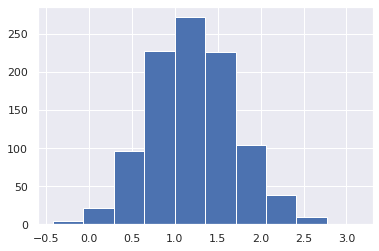

In [ ]:
plt.hist(sample)

In [ ]:
while r < reps:
    #generate the bootstrap sample
    
    indices = np.floor(u[: ,r]*n).astype(int) # (b x 1) vector of integers between 1 and n:
        #these are the indices of master sample elements selected into the
        #bootstrap sample
    bsample = sample[indices]
    allxbar[r] = np.mean(bsample)
    alls2[r] = np.std(bsample)**2
    r = r + 1

In [ ]:
print('Theoretical Facts')
t1 = PrettyTable(['Statistics', 'Value'])
t1.add_row(['xbar', f'{mu:.6f}'])
t1.add_row(['s-sqd', f'{(sigma**2):.6f}'])
print(t1)

Theoretical Facts
+------------+----------+
| Statistics |  Value   |
+------------+----------+
|    xbar    | 1.200000 |
|   s-sqd    | 0.250000 |
+------------+----------+


In [ ]:
print('Theoretical Results')
t1 = PrettyTable(['Estimator', 'Mean', 'Bias', 'Variance', 'MSE'])
t1.add_row(['xbar', f'{mu:.6f}', f'{0:.6f}', f'{((sigma**2)/b):.6f}', f'{((sigma**2)/b):.6f}'])
t1.add_row(['s-sqd', f'{(((b-1)/b)*sigma**2):.6f}', f'{((sigma**2)/b):.6f}',
            f'{(2*(sigma**4)/(b-1)):.6f}', f'{((2*b-1)*(sigma**4)/(b**2)):.6f}' ])
print(t1)

Theoretical Results
+-----------+----------+----------+----------+----------+
| Estimator |   Mean   |   Bias   | Variance |   MSE    |
+-----------+----------+----------+----------+----------+
|    xbar   | 1.200000 | 0.000000 | 0.000250 | 0.000250 |
|   s-sqd   | 0.249750 | 0.000250 | 0.000125 | 0.000125 |
+-----------+----------+----------+----------+----------+


In [ ]:
print('Sample Facts')
t2 = PrettyTable(['Statistics', 'Value'])
t2.add_row(['xbar', f'{xbar:.6f}'])
t2.add_row(['s-sqd', f'{s2:.6f}'])

print(t2)

Sample Facts
+------------+----------+
| Statistics |  Value   |
+------------+----------+
|    xbar    | 1.209666 |
|   s-sqd    | 0.239476 |
+------------+----------+


In [ ]:
print('Theoretical results based on the sample')
t3 = PrettyTable(['Estimator', 'Mean', 'Bias', 'Variance', 'MSE'])
t3.add_row(['xbar', f'{xbar:.6f}', f'{0:.6f}', f'{s2/b:.6f}', f'{s2/b:.6f}'])
t3.add_row(['s-sqd', f'{(((b-1)/b)*s2):.6f}', f'{s2/b:.6f}', f'{(2*(s2**2)/(b-1)):.6f}', f'{((2*b-1)*(s2**2)/(b**2)):.6f}'])

print(t3)


Theoretical results based on the sample
+-----------+----------+----------+----------+----------+
| Estimator |   Mean   |   Bias   | Variance |   MSE    |
+-----------+----------+----------+----------+----------+
|    xbar   | 1.209666 | 0.000000 | 0.000239 | 0.000239 |
|   s-sqd   | 0.239237 | 0.000239 | 0.000115 | 0.000115 |
+-----------+----------+----------+----------+----------+


In [ ]:
print('Bootstrap results,', f'reps = {reps}')
t4 = PrettyTable(['Estimator', 'Mean', 'Bias', 'Variance', 'MSE'])
t4.add_row(['xbar', f'{np.mean(allxbar):.6f}', f'{np.abs(xbar-np.mean(allxbar)):.6f}', 
            f'{np.std(allxbar)**2:.6f}', f'{np.mean((allxbar-xbar)**2):.6f}'])
            
t4.add_row(['s-sqd', f'{np.mean(alls2):.6f}', f'{np.abs(s2-np.mean(alls2)):.6f}', 
            f'{np.std(alls2)**2:.6f}', f'{np.mean((alls2-s2)**2):.6f}'])

print(t4)

Bootstrap results, reps = 10000
+-----------+----------+----------+----------+----------+
| Estimator |   Mean   |   Bias   | Variance |   MSE    |
+-----------+----------+----------+----------+----------+
|    xbar   | 1.209715 | 0.000049 | 0.000238 | 0.000238 |
|   s-sqd   | 0.239140 | 0.000336 | 0.000117 | 0.000117 |
+-----------+----------+----------+----------+----------+


In [ ]:
boot_means = np.mean(allxbar)# bootstrapped sample means
print(boot_means)

boot_std = np.std(allxbar) # bootstrapped std
print(boot_std)

print(np.percentile(allxbar, [2.5,97.5]))# 95% C.I.

1.2097145499315978
0.015437690713716404
[1.179288 1.239743]


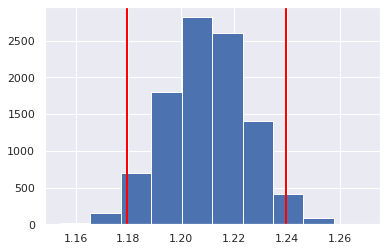

In [ ]:
plt.hist(allxbar, alpha = 1)
plt.axvline(np.percentile(allxbar,2.5),color = 'red',linewidth=2)
plt.axvline(np.percentile(allxbar,97.5),color = 'red',linewidth=2)

In [ ]:
boot_alls2_means = np.mean(alls2)# bootstrapped sample means
print(boot_alls2_means)

boot_alls2_std = np.std(alls2) # bootstrapped std
print(boot_alls2_std)

print(np.percentile(alls2, [2.5,97.5]))# 95% C.I.

0.2391397855415631
0.010797268609715239
[0.218675 0.26108 ]


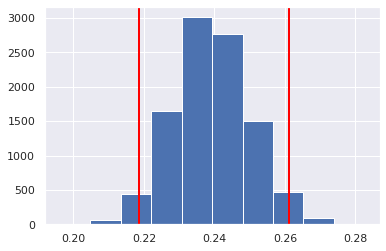

In [ ]:
plt.hist(alls2, alpha = 1)
plt.axvline(np.percentile(alls2,2.5),color = 'red',linewidth=2)
plt.axvline(np.percentile(alls2,97.5),color = 'red',linewidth=2)

# Generating multiple samples and bootstrap repetitions:


In [ ]:
#Parameters
mu = 1.2  # population mean 
sigma = 0.5 # population standard deviation 

In [ ]:
sample_size_lst = [50, 100, 200, 500, 1000, 2000, 3500, 5000, 6500, 8000, 10000]
reps_lst = [10, 100, 1000, 10000]
tables_lst=['sf', 'tr', 'trbs', 'bs']

In [ ]:
def create_empty_df(column_names):
    df = pd.DataFrame(columns = column_names)
    
    return df 

In [ ]:
encompassing_df = None

for ss in sample_size_lst:
    np.random.seed(20)
    sample = mu + sigma * np.random.randn(ss)
    xbar = np.mean(sample)    # sample mean
    #print('xbar:', xbar)
    s2 = np.std(sample)**2  # uncorrected sample variance
    #print('s2:', s2)
    sf_flag = True
    tr_flag = True
    trbs_flag = True
    for reps in reps_lst:
        allxbar  = np.zeros((reps, 1))
        alls2    = np.zeros((reps, 1))
        np.random.seed(12)
        u = np.random.random((ss,reps))
        r = 0
        while r < reps:
            indices = np.floor(u[: ,r]*ss).astype(int) # (b x 1) vector of integers between 1 and n:
        #these are the indices of master sample elements selected into the
        #bootstrap sample
            bsample = sample[indices]
            allxbar[r] = np.mean(bsample)
            alls2[r] = np.std(bsample)**2
            r = r + 1
         
        for tab in tables_lst:
            b = ss
                
            if tab == 'tr' and tr_flag:
                tr_df = create_empty_df(['Result_Type', 'Sample_Size','Bs_Resample', 'Sample_Facts', 'Statistics/Estimator', 'Mean', 'Bias', 'Variance', 'RMSE'])
                tr_df['Result_Type'] = [tab, tab]
                tr_df['Sample_Size'] = [b, b]
                tr_df['Bs_Resample'] = [np.nan, np.nan]
                tr_df['Sample_Facts'] = [xbar, s2]
                tr_df['Statistics/Estimator'] = ['xbar', 's-sqd']
                tr_df['Mean'] = [mu, (((b-1)/b)*sigma**2)]
                tr_df['Bias'] = [0, ((sigma**2)/b)]
                tr_df['Variance'] = [((sigma**2)/b), (2*(sigma**4)/(b-1))]
                tr_df['RMSE'] = [np.sqrt(((sigma**2)/b)), np.sqrt(((2*b-1)*(sigma**4)/(b**2)))]

                tr_flag = False
                encompassing_df = pd.concat([encompassing_df, tr_df])
                
            
            elif tab == 'trbs' and trbs_flag:
                trbs_df = create_empty_df(['Result_Type', 'Sample_Size','Bs_Resample', 'Sample_Facts', 'Statistics/Estimator', 'Mean', 'Bias', 'Variance', 'RMSE'])
                trbs_df['Result_Type'] = [tab, tab]
                trbs_df['Sample_Size'] = [b, b]
                trbs_df['Bs_Resample'] = [np.nan, np.nan]
                trbs_df['Sample_Facts'] = [xbar, s2]
                trbs_df['Statistics/Estimator'] = ['xbar', 's-sqd']
                trbs_df['Mean'] = [xbar, (((b-1)/b)*s2)]
                trbs_df['Bias'] = [0, s2/b]
                trbs_df['Variance'] = [s2/b, (2*(s2**2)/(b-1))]
                trbs_df['RMSE'] = [np.sqrt(s2/b), np.sqrt(((2*b-1)*(s2**2)/(b**2)))]

                trbs_flag = False
                encompassing_df = pd.concat([encompassing_df, trbs_df])
                
            elif tab == 'bs': 
                bs_df = create_empty_df(['Result_Type', 'Sample_Size','Bs_Resample', 'Sample_Facts', 'Statistics/Estimator', 'Mean', 'Bias', 'Variance', 'RMSE'])
                bs_df['Result_Type'] = [tab, tab]
                bs_df['Sample_Size'] = [b, b]
                bs_df['Bs_Resample'] = [reps, reps]
                bs_df['Sample_Facts'] = [xbar, s2]
                bs_df['Statistics/Estimator'] = ['xbar', 's-sqd']
                bs_df['Mean'] = [np.mean(allxbar), np.mean(alls2)]
                bs_df['Bias'] = [np.abs(xbar-np.mean(allxbar)), np.abs(s2-np.mean(alls2))]
                bs_df['Variance'] = [np.std(allxbar)**2, np.std(alls2)**2]
                bs_df['RMSE'] = [np.sqrt(np.mean((allxbar-xbar)**2)), np.sqrt(np.mean((alls2-s2)**2))]

                encompassing_df = pd.concat([encompassing_df, bs_df])
        
        
encompassing_df = encompassing_df.reset_index(drop = True)        

(array([  17.,   96.,  621., 1761., 2850., 2766., 1414.,  404.,   62.,
           9.]),
 array([-0.701927, -0.309982,  0.081962,  0.473906,  0.86585 ,  1.257794,
         1.649738,  2.041682,  2.433626,  2.82557 ,  3.217514]),
 <a list of 10 Patch objects>)

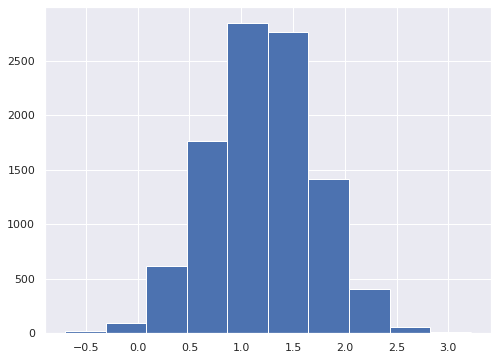

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(sample)

In [ ]:
encompassing_df

,Result_Type,Sample_Size,Bs_Resample,Sample_Facts,Statistics/Estimator,Mean,Bias,Variance,RMSE
0,tr,50,NaN,1.209534,xbar,1.200000,0.000000,0.005000,0.070711
1,tr,50,NaN,0.305204,s-sqd,0.245000,0.005000,0.002551,0.049749
2,trbs,50,NaN,1.209534,xbar,1.209534,0.000000,0.006104,0.078129
3,trbs,50,NaN,0.305204,s-sqd,0.299099,0.006104,0.003802,0.060735
4,bs,50,10.0,1.209534,xbar,1.229044,0.019510,0.002508,0.053742
...,...,...,...,...,...,...,...,...,...
127,bs,10000,100.0,0.250100,s-sqd,0.250230,0.000131,0.000013,0.003651
128,bs,10000,1000.0,1.208015,xbar,1.207993,0.000022,0.000025,0.004990
129,bs,10000,1000.0,0.250100,s-sqd,0.250052,0.000047,0.000012,0.003445
130,bs,10000,10000.0,1.208015,xbar,1.207973,0.000042,0.000026,0.005050


In [ ]:
encomp_hier = encompassing_df.set_index(['Sample_Size', 'Bs_Resample', 'Sample_Facts'])

In [ ]:
encomp_hier

Result_Type  ...      RMSE
Sample_Size Bs_Resample Sample_Facts              ...          
50          NaN         1.209534              tr  ...  0.070711
                        0.305204              tr  ...  0.049749
                        1.209534            trbs  ...  0.078129
                        0.305204            trbs  ...  0.060735
            10.0        1.209534              bs  ...  0.053742
...                                          ...  ...       ...
10000       100.0       0.250100              bs  ...  0.003651
            1000.0      1.208015              bs  ...  0.004990
                        0.250100              bs  ...  0.003445
            10000.0     1.208015              bs  ...  0.005050
                        0.250100              bs  ...  0.003553

[132 rows x 6 columns]

In [ ]:
idx = pd.IndexSlice
encomp_hier.loc[idx[:, 100], :]

Result_Type  ...      RMSE
Sample_Size Bs_Resample Sample_Facts              ...          
50          100.0       1.209534              bs  ...  0.080735
                        0.305204              bs  ...  0.063684
100         100.0       1.172737              bs  ...  0.056335
                        0.287592              bs  ...  0.038485
200         100.0       1.208042              bs  ...  0.036904
                        0.270055              bs  ...  0.026090
500         100.0       1.207423              bs  ...  0.021543
                        0.239109              bs  ...  0.013560
1000        100.0       1.199651              bs  ...  0.014667
                        0.241453              bs  ...  0.008955
2000        100.0       1.196920              bs  ...  0.010738
                        0.248963              bs  ...  0.007656
3500        100.0       1.201880              bs  ...  0.008383
                        0.245782              bs  ...  0.006377
5000        100.0       1.199423              bs  ...  0.007545
                        0.244304              bs  ...  0.004117
6500        100.0       1.203425              bs  ...  0.006626
                        0.247292              bs  ...  0.003897
8000        100.0       1.206864              bs  ...  0.005960
                        0.248533              bs  ...  0.003837
10000       100.0       1.208015              bs  ...  0.005067
                        0.250100              bs  ...  0.003651

[22 rows x 6 columns]

In [ ]:
encomp_hier.loc[[100]]

Result_Type  ...      RMSE
Sample_Size Bs_Resample Sample_Facts              ...          
100         NaN         1.172737              tr  ...  0.050000
                        0.287592              tr  ...  0.035267
                        1.172737            trbs  ...  0.053628
                        0.287592            trbs  ...  0.040570
            10.0        1.172737              bs  ...  0.059353
                        0.287592              bs  ...  0.045062
            100.0       1.172737              bs  ...  0.056335
                        0.287592              bs  ...  0.038485
            1000.0      1.172737              bs  ...  0.052976
                        0.287592              bs  ...  0.038647
            10000.0     1.172737              bs  ...  0.053433
                        0.287592              bs  ...  0.038285

[12 rows x 6 columns]

In [ ]:
bs_samples = encomp_hier[(encomp_hier['Result_Type'] == 'bs') & (encomp_hier['Statistics/Estimator'] == 'xbar')]

In [ ]:
bs_samples

Result_Type  ...      RMSE
Sample_Size Bs_Resample Sample_Facts              ...          
50          10.0        1.209534              bs  ...  0.053742
            100.0       1.209534              bs  ...  0.080735
            1000.0      1.209534              bs  ...  0.078551
            10000.0     1.209534              bs  ...  0.078425
100         10.0        1.172737              bs  ...  0.059353
            100.0       1.172737              bs  ...  0.056335
            1000.0      1.172737              bs  ...  0.052976
            10000.0     1.172737              bs  ...  0.053433
200         10.0        1.208042              bs  ...  0.056470
            100.0       1.208042              bs  ...  0.036904
            1000.0      1.208042              bs  ...  0.036442
            10000.0     1.208042              bs  ...  0.036817
500         10.0        1.207423              bs  ...  0.020871
            100.0       1.207423              bs  ...  0.021543
            1000.0      1.207423              bs  ...  0.021765
            10000.0     1.207423              bs  ...  0.022023
1000        10.0        1.199651              bs  ...  0.014128
            100.0       1.199651              bs  ...  0.014667
            1000.0      1.199651              bs  ...  0.015536
            10000.0     1.199651              bs  ...  0.015513
2000        10.0        1.196920              bs  ...  0.006458
            100.0       1.196920              bs  ...  0.010738
            1000.0      1.196920              bs  ...  0.010963
            10000.0     1.196920              bs  ...  0.011164
3500        10.0        1.201880              bs  ...  0.005497
            100.0       1.201880              bs  ...  0.008383
            1000.0      1.201880              bs  ...  0.008511
            10000.0     1.201880              bs  ...  0.008383
5000        10.0        1.199423              bs  ...  0.008928
            100.0       1.199423              bs  ...  0.007545
            1000.0      1.199423              bs  ...  0.006897
            10000.0     1.199423              bs  ...  0.007001
6500        10.0        1.203425              bs  ...  0.003545
            100.0       1.203425              bs  ...  0.006626
            1000.0      1.203425              bs  ...  0.006349
            10000.0     1.203425              bs  ...  0.006196
8000        10.0        1.206864              bs  ...  0.004423
            100.0       1.206864              bs  ...  0.005960
            1000.0      1.206864              bs  ...  0.005683
            10000.0     1.206864              bs  ...  0.005664
10000       10.0        1.208015              bs  ...  0.004189
            100.0       1.208015              bs  ...  0.005067
            1000.0      1.208015              bs  ...  0.004990
            10000.0     1.208015              bs  ...  0.005050

[44 rows x 6 columns]

In [ ]:
bs_sample = encompassing_df[(encompassing_df['Result_Type'] == 'bs') & (encompassing_df['Statistics/Estimator'] == 'xbar')]

In [ ]:
bs_sample

,Result_Type,Sample_Size,Bs_Resample,Sample_Facts,Statistics/Estimator,Mean,Bias,Variance,RMSE
4,bs,50,10.0,1.209534,xbar,1.229044,0.019510,0.002508,0.053742
6,bs,50,100.0,1.209534,xbar,1.218243,0.008709,0.006442,0.080735
8,bs,50,1000.0,1.209534,xbar,1.210125,0.000591,0.006170,0.078551
10,bs,50,10000.0,1.209534,xbar,1.209821,0.000287,0.006150,0.078425
16,bs,100,10.0,1.172737,xbar,1.159238,0.013498,0.003341,0.059353
18,bs,100,100.0,1.172737,xbar,1.174904,0.002167,0.003169,0.056335
20,bs,100,1000.0,1.172737,xbar,1.171441,0.001295,0.002805,0.052976
22,bs,100,10000.0,1.172737,xbar,1.172950,0.000214,0.002855,0.053433
28,bs,200,10.0,1.208042,xbar,1.216246,0.008205,0.003122,0.056470
30,bs,200,100.0,1.208042,xbar,1.215312,0.007270,0.001309,0.036904


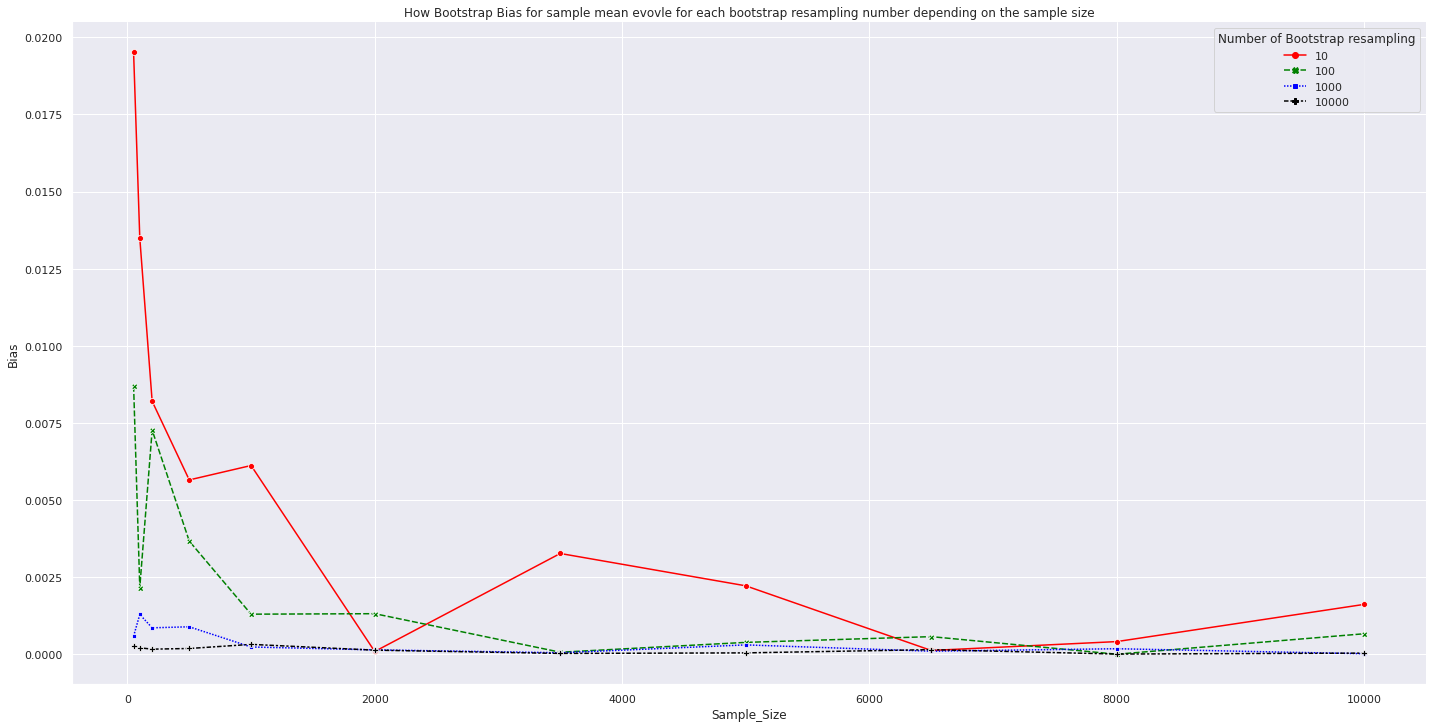

In [ ]:
g = sns.relplot(x="Sample_Size", y="Bias", hue = 'Bs_Resample', style = 'Bs_Resample', 
            palette = ['red','green','blue','black' ],  kind="line",  facet_kws={'legend_out': False}, 
            data=bs_sample, markers=True, height = 10, aspect = 2).set(title = 'How Bootstrap Bias for sample mean evovle for each bootstrap resampling number depending on the sample size')

leg = g.axes.flat[0].get_legend()
new_title = 'Number of Bootstrap resampling'
leg.set_title(new_title)
new_labels = ['10', '100', '1000', '10000']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

plt.show(g)